In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.model_selection import train_test_split

from lightgbm import LGBMRegressor

In [2]:
# importing data

train = pd.read_csv('sales_train.csv.gz', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test = pd.read_csv('test.csv')
shops = pd.read_csv('shops.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')

# checking the shapes of these datasets
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)
print("Shape of shops:", shops.shape)
print("Shape of items:", items.shape)
print("Shape of item_categories:", item_categories.shape)

Shape of train: (2935849, 6)
Shape of test: (214200, 3)
Shape of shops: (60, 2)
Shape of items: (22170, 3)
Shape of item_categories: (84, 2)


In [3]:
# checking if there is any Null data inside the given data

print("Number of Null values in the train set :", train.isnull().sum().sum())
print("Number of Null values in the test set :", test.isnull().sum().sum())
print("Number of Null values in the item set :", items.isnull().sum().sum())
print("Number of Null values in the shops set :", shops.isnull().sum().sum())
print("Number of Null values in the item_categories set :", item_categories.isnull().sum().sum())

Number of Null values in the train set : 0
Number of Null values in the test set : 0
Number of Null values in the item set : 0
Number of Null values in the shops set : 0
Number of Null values in the item_categories set : 0


In [4]:
#sample of training dataset

train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [5]:
train['item_cnt_day'].nunique()

198

In [6]:
# sample of test data set

test.sample(5)

,ID,shop_id,item_id
86201,86201,16,846
202226,202226,44,11535
180255,180255,38,13335
57145,57145,25,4897
50967,50967,31,11467


In [7]:
# sample of shops data set

shops.sample(10)

,shop_name,shop_id
21,"Москва МТРЦ ""Афи Молл""",21
33,"Мытищи ТРК ""XL-3""",33
52,"Уфа ТК ""Центральный""",52
31,"Москва ТЦ ""Семеновский""",31
14,"Казань ТЦ ""ПаркХаус"" II",14
37,"Новосибирск ТЦ ""Мега""",37
29,"Москва ТЦ ""Новый век"" (Новокосино)",29
6,"Воронеж (Плехановская, 13)",6
46,"Сергиев Посад ТЦ ""7Я""",46
55,Цифровой склад 1С-Онлайн,55


In [8]:
shops.dtypes

shop_name    object
shop_id       int64
dtype: object

In [9]:
# sample of items dataset

items.sample(6)

,item_name,item_id,item_category_id
13055,КУХНЯ (Сезон 3),13055,40
20916,Фигурка Миньон Джерри,20916,72
9150,БЫТЬ ДЖОНОМ МАЛКОВИЧЕМ (BD),9150,37
19345,Секреты проф.работы с 1С:ЗУП 8. Организация ка...,19345,49
2842,Dishonored. The Knife of Dunwall (Дополнение) ...,2842,31
16966,ПЕРЕГОВОРЩИК (регион),16966,40


In [10]:
# checking the sample of item_categories dataset

item_categories.sample(5)

,item_category_name,item_category_id
63,Подарки - Мягкие игрушки,63
69,Подарки - Сувениры,69
59,Музыка - Музыкальное видео,59
77,Программы - Обучающие,77
45,Книги - Аудиокниги 1С,45


In [11]:
# describing the training set

train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [12]:
# getting the information about the data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


<AxesSubplot:>

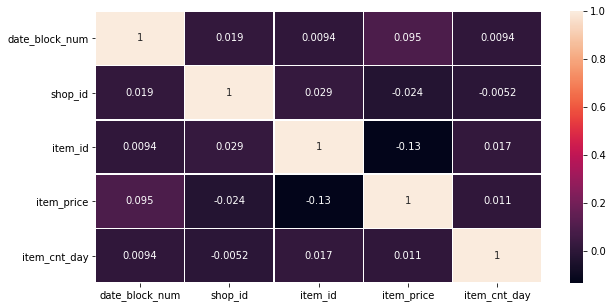

In [13]:
corr =train.corr()
fig= plt.subplots(figsize=(10,5)) 
sns.heatmap(corr, annot=True,linewidths=.5)

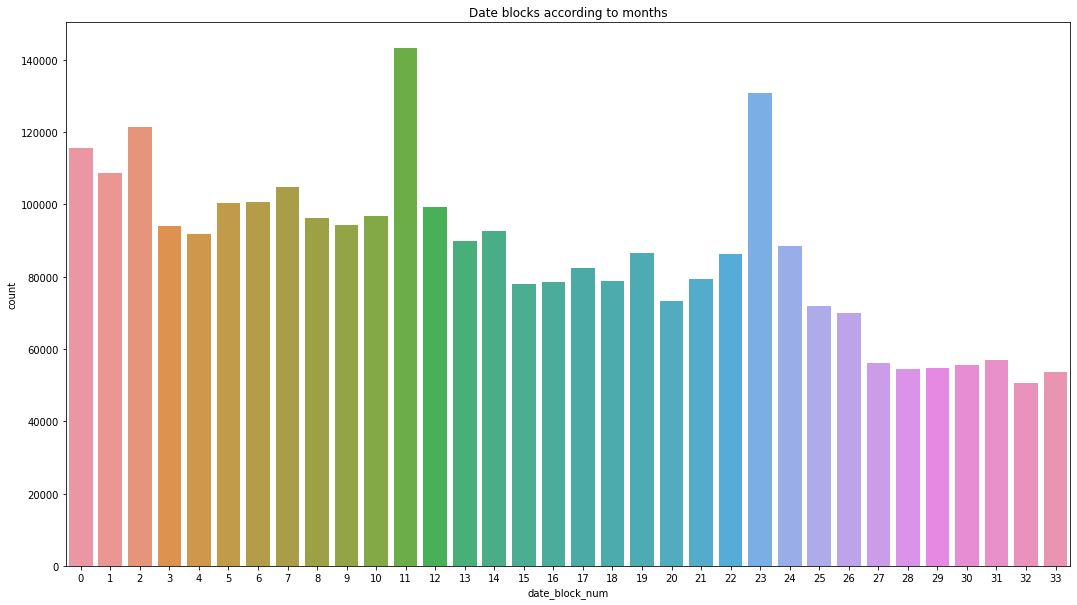

In [14]:
# having a look at the distribution of item sold per day

fig= plt.subplots(figsize=(18,10)) 
sns.countplot(train['date_block_num'])
plt.title('Date blocks according to months')

plt.show()

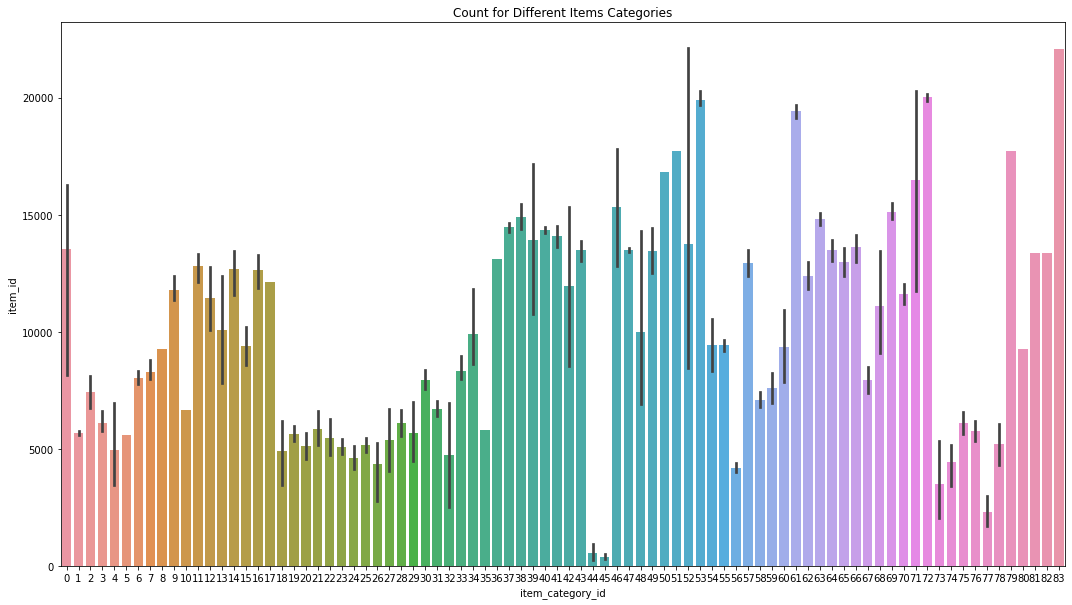

In [15]:
# looking at the number of different categories

fig= plt.subplots(figsize=(18,10)) 
sns.barplot(items['item_category_id'], items['item_id'])
plt.title('Count for Different Items Categories')
plt.show()

In [16]:
# making a new column day
train['day'] = train['date'].dt.day

# making a new column month
train['month'] = train['date'].dt.month

# making a new column year
train['year'] = train['date'].dt.year

# making a new column week
train['week'] = train['date'].dt.week

# checking the new columns
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

<AxesSubplot:title={'center':'day'}>

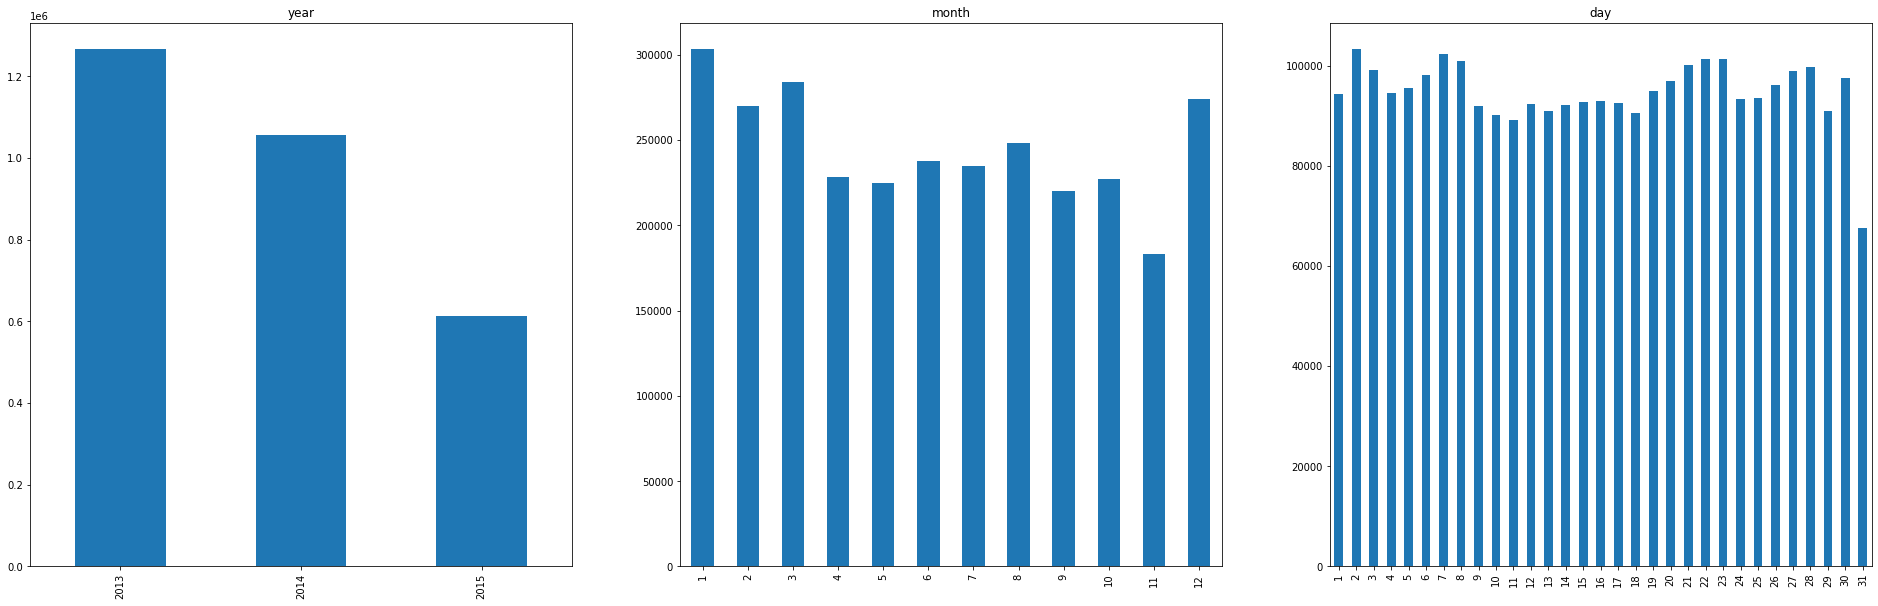

In [17]:
fig, axes = plt.subplots(1,3, figsize=(33,10))

train.year.value_counts().sort_index().plot.bar(ax=axes[0],title='year')
train.month.value_counts().sort_index().plot.bar(ax=axes[1],title='month')
train.day.value_counts().sort_index().plot.bar(ax=axes[2],title='day')

In [18]:
# checking the no. of unique item present in the stores

x = train['item_id'].nunique()
print("The No. of Unique Items Present in the stores available: ", x)

The No. of Unique Items Present in the stores available:  21807


In [19]:
# checking the no. of unique item present in the stores

x = item_categories['item_category_id'].nunique()
print("The No. of Unique categories for Items Present in the stores available: ", x)

The No. of Unique categories for Items Present in the stores available:  84


In [20]:
# checking the no. of unique shops given in the dataset

x = train['shop_id'].nunique()
print("No. of Unique Shops are :", x)

No. of Unique Shops are : 60


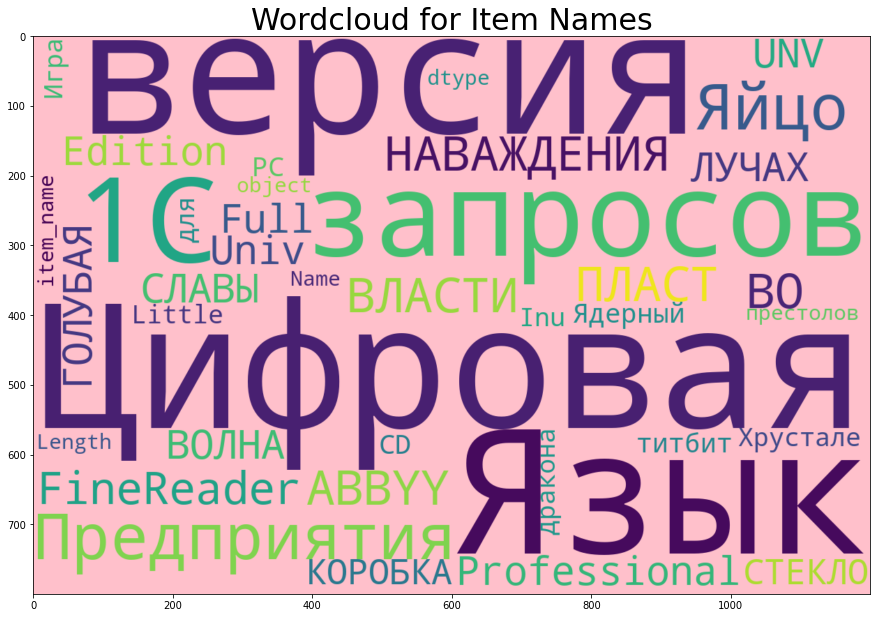

In [21]:
# making a word cloud for item name


plt.figure(figsize=(15,13))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(items['item_name']))


plt.title('Wordcloud for Item Names', fontsize = 30)

plt.imshow(wordcloud, interpolation = 'bilinear')

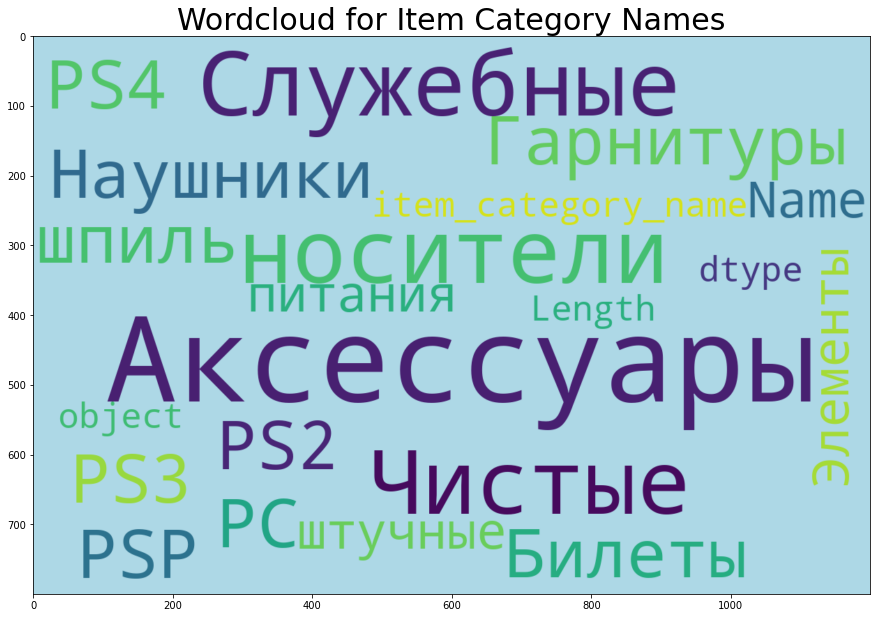

In [22]:
# making a word cloud for item categories name

plt.figure(figsize=(15,13))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(item_categories['item_category_name']))


plt.title('Wordcloud for Item Category Names', fontsize = 30)

plt.imshow(wordcloud, interpolation = 'bilinear')

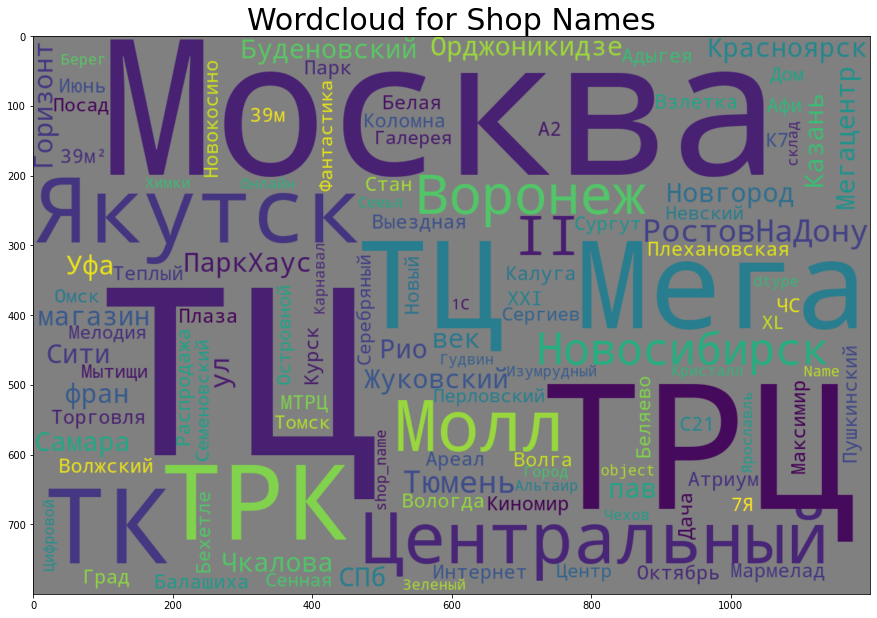

In [23]:
# making a word cloud for shop name

plt.figure(figsize=(15,13))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'gray',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(shops['shop_name']))


plt.title('Wordcloud for Shop Names', fontsize = 30)

plt.imshow(wordcloud, interpolation = 'bilinear')

In [24]:
# checking the columns of the train data

train.columns


Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

In [25]:
train.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
day                        int64
month                      int64
year                       int64
week                       int64
dtype: object

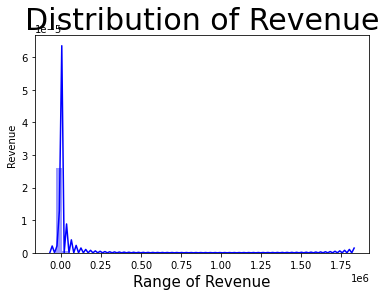

In [26]:
# feature engineering

train['revenue'] = train['item_price'] * train['item_cnt_day']

sns.distplot(train['revenue'], color = 'blue')
plt.title('Distribution of Revenue', fontsize = 30)
plt.xlabel('Range of Revenue', fontsize = 15)
plt.ylabel('Revenue')
plt.show()

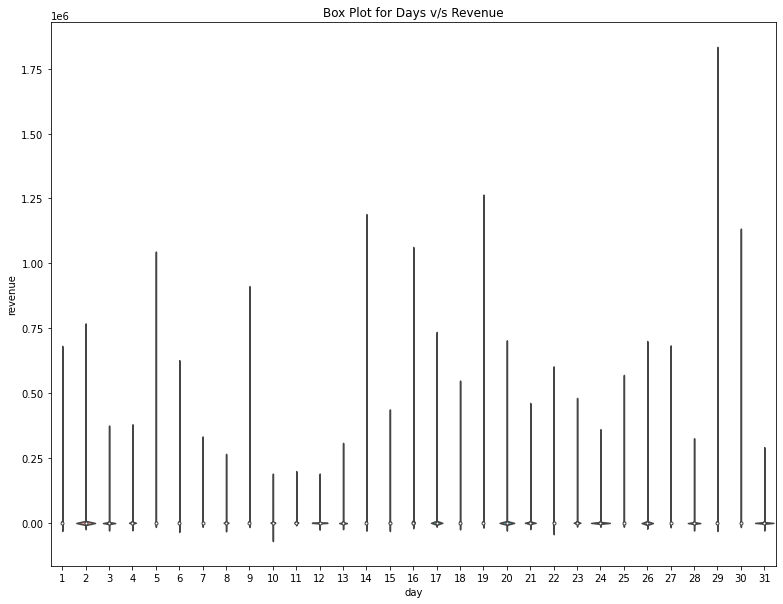

In [27]:
# plotting a box plot for itemprice and item-cnt-day

plt.figure(figsize=(13,10))
sns.violinplot(x = train['day'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue')
plt.show()

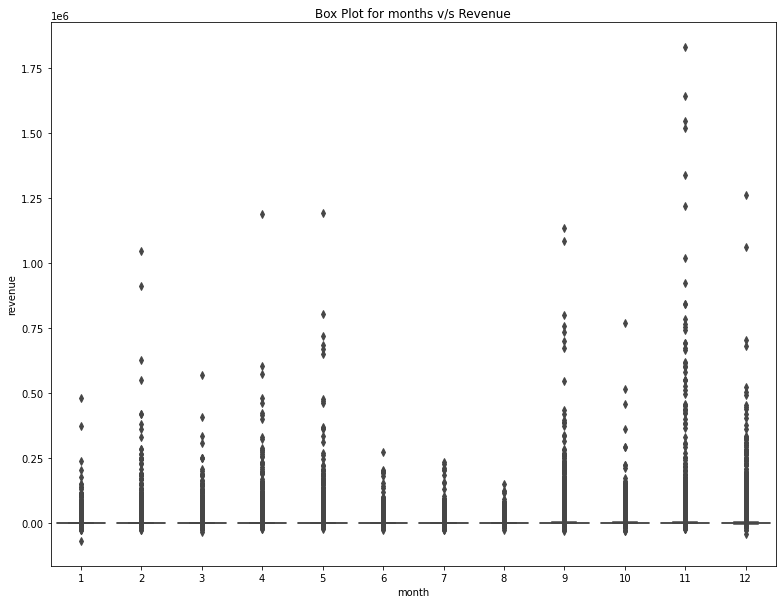

In [28]:
# plotting a box plot for itemprice and item-cnt-day

plt.figure(figsize=(13,10))
sns.boxplot(x = train['month'], y = train['revenue'])
plt.title('Box Plot for months v/s Revenue')
plt.show()

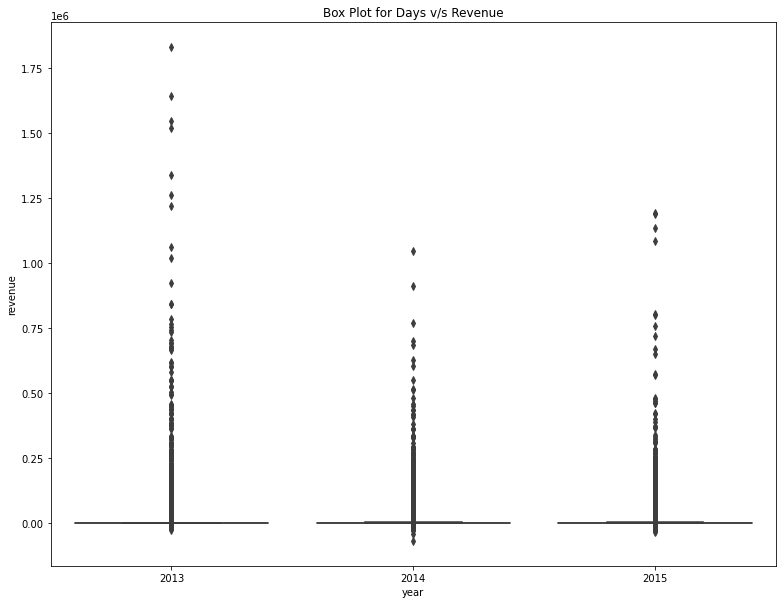

In [29]:
# plotting a box plot for itemprice and item-cnt-day

plt.figure(figsize=(13,10))
sns.boxplot(x = train['year'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue')
plt.show()

In [30]:
# converting the data into monthly sales data

# making a dataset with only monthly sales data
data = train.groupby([train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

# specifying the important attributes which we want to add to the data
data = data[['date','item_id','shop_id','item_cnt_day']]

# at last we can select the specific attributes from the dataset which are important 
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

# looking at the newly prepared datset
data.shape

(424124, 36)

In [31]:
# let's merge the monthly sales data prepared to the test data set

test = pd.merge(test, data, on = ['item_id', 'shop_id'], how = 'left')

# filling the empty values found in the dataset
test.fillna(0, inplace = True)

# checking the dataset
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# now let's create the actual training data

x_train = test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = test['2015-10']

# deleting the first column so that it can predict the future sales data
x_test = test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)

# checking the shapes of the datasets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_train.shape)

Shape of x_train : (214200, 34)
Shape of x_test : (214200, 34)
Shape of y_test : (214200,)


In [33]:
# let's check the x_train dataset

x_train.head()

,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# let's check the x_test data

x_test.head()

,ID,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# splitting the data into train and valid dataset


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_valid :", x_val.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_valid :", y_val.shape)

Shape of x_train : (160650, 34)
Shape of x_valid : (53550, 34)
Shape of y_train : (160650,)
Shape of y_valid : (53550,)


In [54]:
# MODELING

model_lgb = LGBMRegressor( n_estimators=200)
model_lgb.fit(x_train, y_train)

y_pred_lgb = model_lgb.predict(x_val)



In [55]:
from sklearn.metrics import r2_score 
cm = r2_score (y_val, y_pred_lgb)
cm

-3.351069784679191

In [48]:
# Get the test set predictions and clip values to the specified range
y_pred_lgb = model_lgb.predict(x_test).clip(0., 20.)

# Create the submission file and submit
preds = pd.DataFrame(y_pred_lgb, columns=['item_cnt_month'])
preds.to_csv('submission.csv',index_label='ID')

In [49]:
result =pd.read_csv('submission.csv')
result.head()

,ID,item_cnt_month
0,0,0.574310
1,1,0.270630
2,2,0.881739
3,3,0.310577
4,4,0.270630


In [50]:
np.shape(result)

(214200, 2)

In [51]:
from sklearn.linear_model import BayesianRidge 

In [52]:
model = BayesianRidge() 
model.fit(x_train, y_train)
prediction = model.predict(x_val)
cm2 = r2_score (y_val, prediction)
cm2

-3.669276530045625

In [56]:
# Get the test set predictions and clip values to the specified range
y_pred_lgb = model_lgb.predict(x_test).clip(0., 20.)

# Create the submission file and submit
preds = pd.DataFrame(y_pred_lgb, columns=['item_cnt_month'])
preds.to_csv('submission1.csv',index_label='ID')

In [57]:
result1 =pd.read_csv('submission1.csv')
result1.head()

,ID,item_cnt_month
0,0,0.574310
1,1,0.270630
2,2,0.881739
3,3,0.310577
4,4,0.270630
